# **OBESITY DETECTION USING MACHINE LEARNING**

# **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Importing Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import joblib  # For saving the model
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# **Loading Dataset**

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')

# **Data Exploration**

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.shape

(2111, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
# Checking for null values
print("Null values in the dataset:")
print(df.isnull().sum())


Null values in the dataset:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
# Renaming columns for readability
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
              'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables',
              'Number of main meals', 'Consumption of food between meals', 'Smoke',
              'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency',
              'Time using technology devices', 'Consumption of alcohol', 'Transportation used', 'Obesity']

In [ ]:
# Replacing underscores with spaces in some columns
df['Obesity'] = df['Obesity'].apply(lambda x: x.replace('_', ' '))
df['Transportation used'] = df['Transportation used'].apply(lambda x: x.replace('_', ' '))
df.head()


,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public Transportation,Normal Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public Transportation,Normal Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight Level I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public Transportation,Overweight Level II


In [ ]:
# Converting Height to cm and rounding numerical values
df['Height'] = df['Height'] * 100
df['Height'] = df['Height'].round(1)
df['Weight'] = df['Weight'].round(1)
df['Age'] = df['Age'].round(1)
df.head()


,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public Transportation,Overweight Level II


In [ ]:
# Round relevant columns
for x in ['Frequency of consumption of vegetables', 'Number of main meals',
          'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    df[x] = df[x].apply(round)
    df.head()

In [ ]:
# Replacing numerical values with categorical mappings
mapping0 = {1: 'Never', 2: 'Sometimes', 3: 'Always'}
mapping1 = {1: '1', 2: '2', 3: '3', 4: '3+'}
mapping2 = {1: 'Less than a liter', 2: 'Between 1 and 2 L', 3: 'More than 2 L'}
mapping3 = {0: 'I do not have', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}
mapping4 = {0: '0–2 hours', 1: '3–5 hours', 2: 'More than 5 hours'}



In [ ]:
df['Frequency of consumption of vegetables'] = df['Frequency of consumption of vegetables'].replace(mapping0)
df['Number of main meals'] = df['Number of main meals'].replace(mapping1)
df['Consumption of water daily'] = df['Consumption of water daily'].replace(mapping2)
df['Physical activity frequency'] = df['Physical activity frequency'].replace(mapping3)
df['Time using technology devices'] = df['Time using technology devices'].replace(mapping4)
df.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,I do not have,3–5 hours,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,Always,3,Sometimes,yes,More than 2 L,yes,4 or 5 days,0–2 hours,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3–5 hours,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,Always,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0–2 hours,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,Sometimes,1,Sometimes,no,Between 1 and 2 L,no,I do not have,0–2 hours,Sometimes,Public Transportation,Overweight Level II


# **Data Visualization**

## **Height Vs Weight**

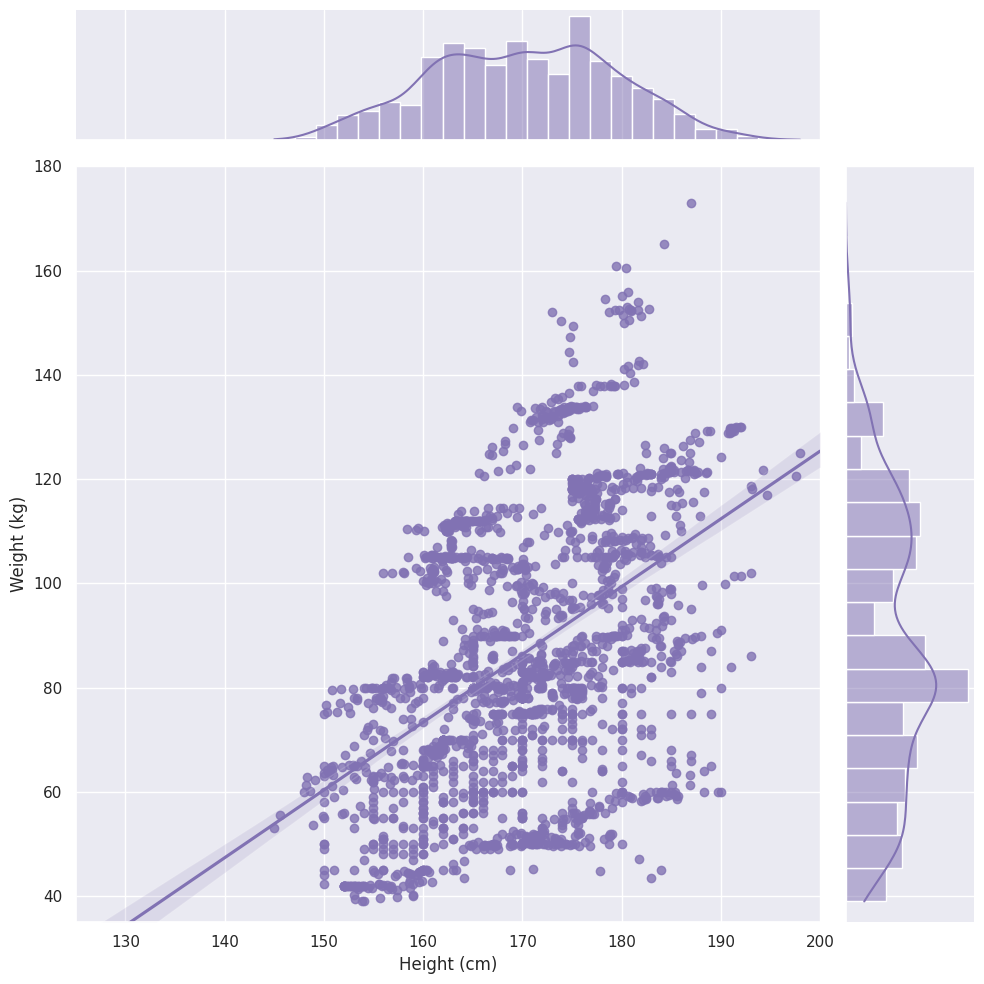

In [ ]:
# Visualization: Height vs Weight
sns.set()
g = sns.jointplot(x="Height", y="Weight", data=df, kind="reg", truncate=False, xlim=(125, 200), ylim=(35, 180), color="m", height=10)
g.set_axis_labels("Height (cm)", "Weight (kg)")


## **Height Vs Weight By Gender**

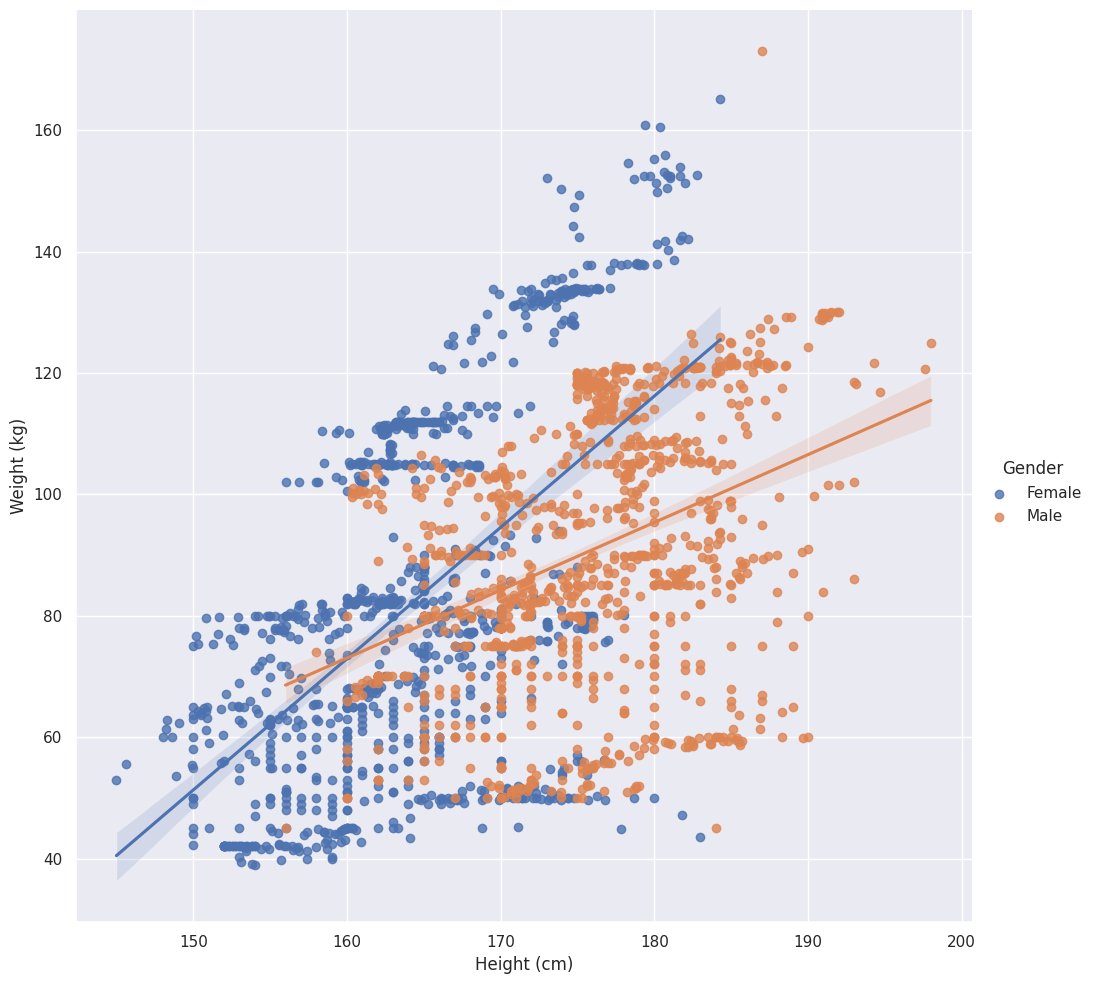

In [ ]:
# Visualization: Height vs Weight by Gender
g = sns.lmplot(x="Height", y="Weight", hue="Gender", height=10, data=df)
g.set_axis_labels("Height (cm)", "Weight (kg)")

## **Gender Vs Height and Weight**

<Axes: xlabel='Gender', ylabel='Weight'>

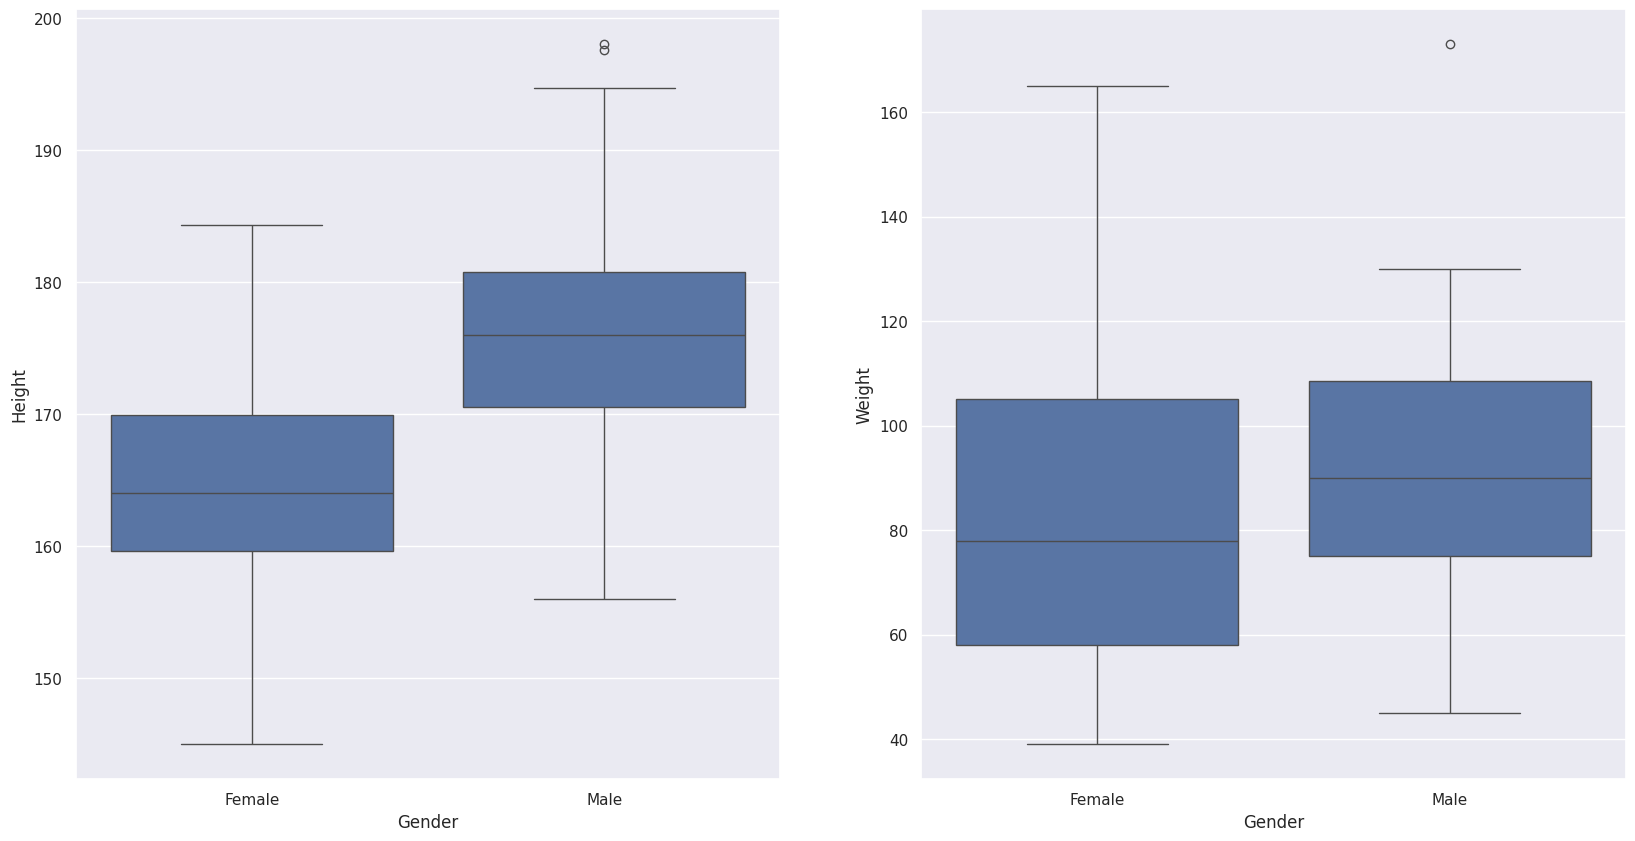

In [ ]:
# Boxplots for Gender vs Height and Weight
sns.set()
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Height', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Weight', data=df)


## **Obesity Levels**

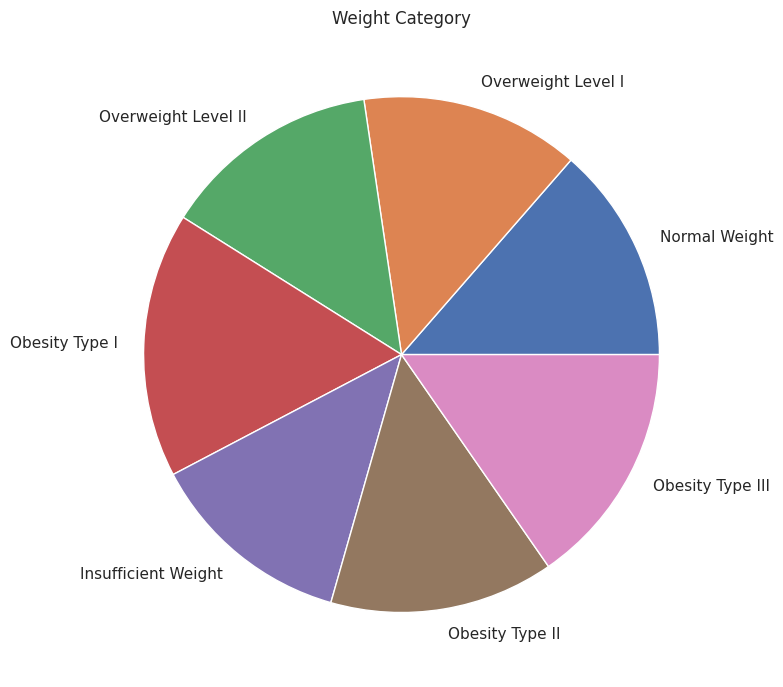

In [ ]:
# Pie Chart of Obesity
c = Counter(df['Obesity'])
fig = plt.figure(figsize=(8,8))
plt.pie([float(c[v]) for v in c], labels=[str(k) for k in c], autopct=None)
plt.title('Weight Category')
plt.tight_layout()

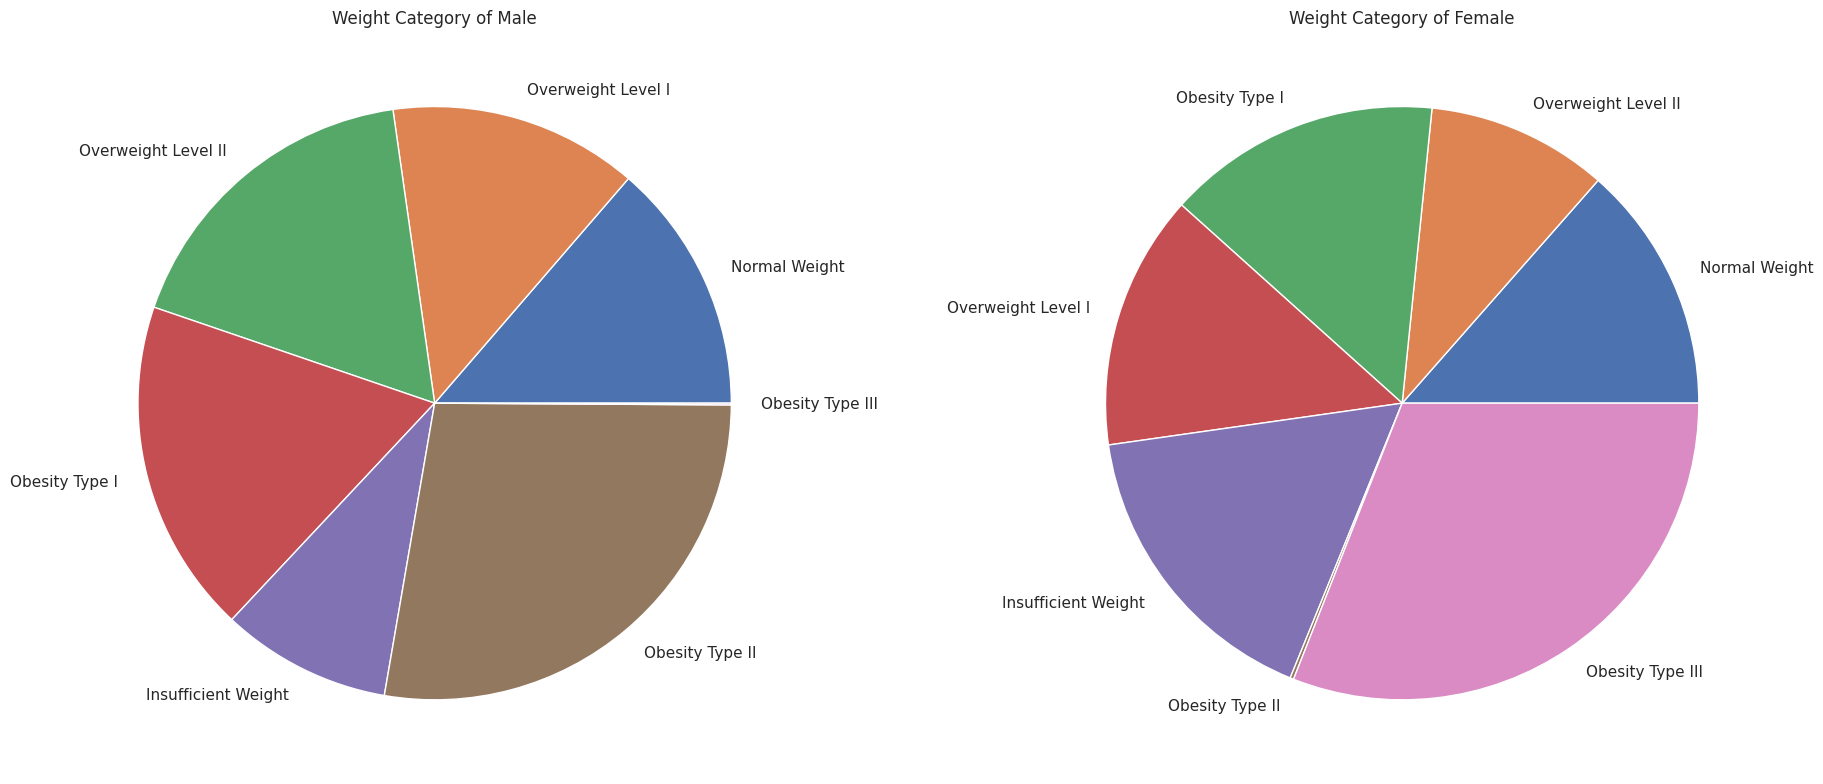

In [ ]:
# Pie Charts by Gender
filt = df['Gender'] == 'Male'
c_m = Counter(df.loc[filt, 'Obesity'])
c_f = Counter(df.loc[~filt, 'Obesity'])

fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.pie([float(c_m[v]) for v in c_m], labels=[str(k) for k in c_m], autopct=None)
plt.title('Weight Category of Male')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.pie([float(c_f[v]) for v in c_f], labels=[str(k) for k in c_f], autopct=None)
plt.title('Weight Category of Female')
plt.tight_layout()

## **Eating and Exercise Habits**

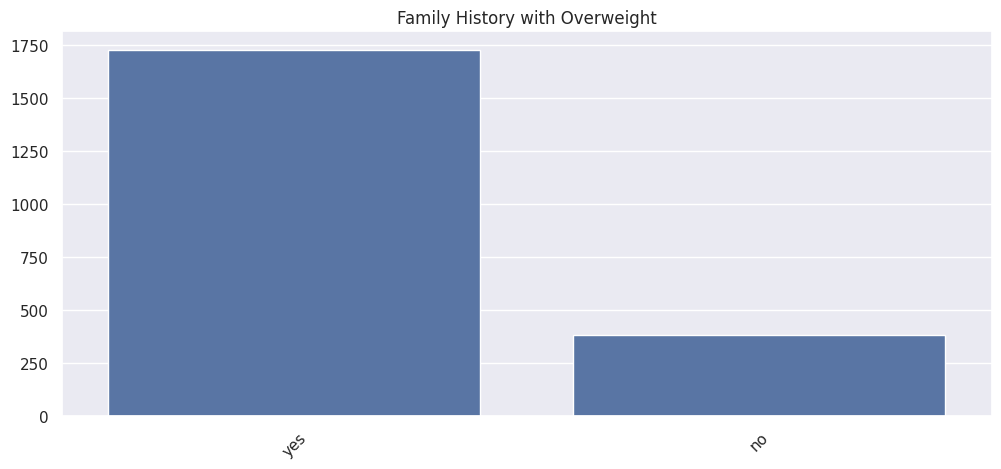

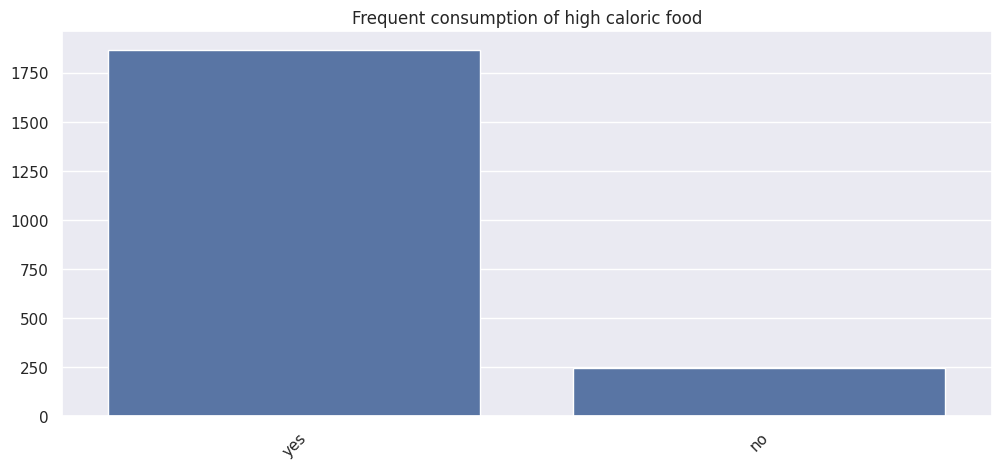

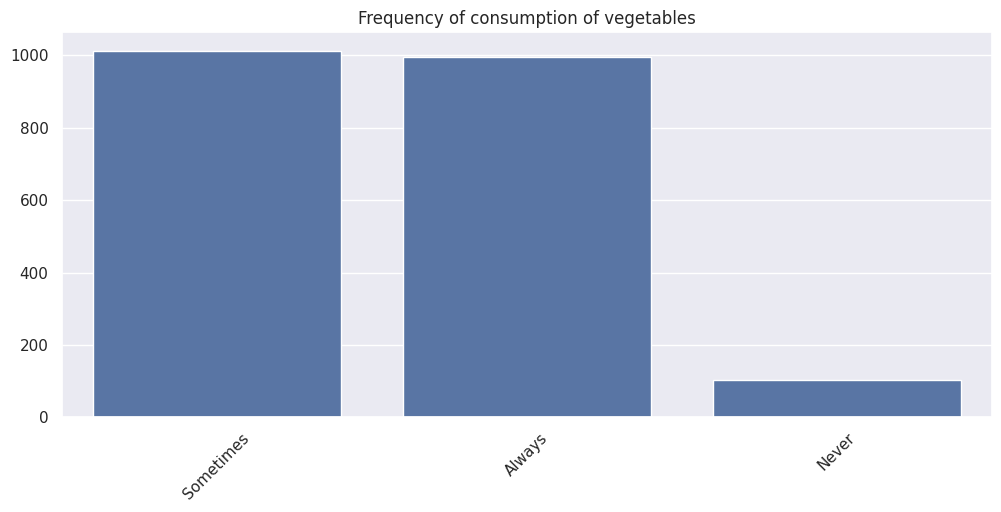

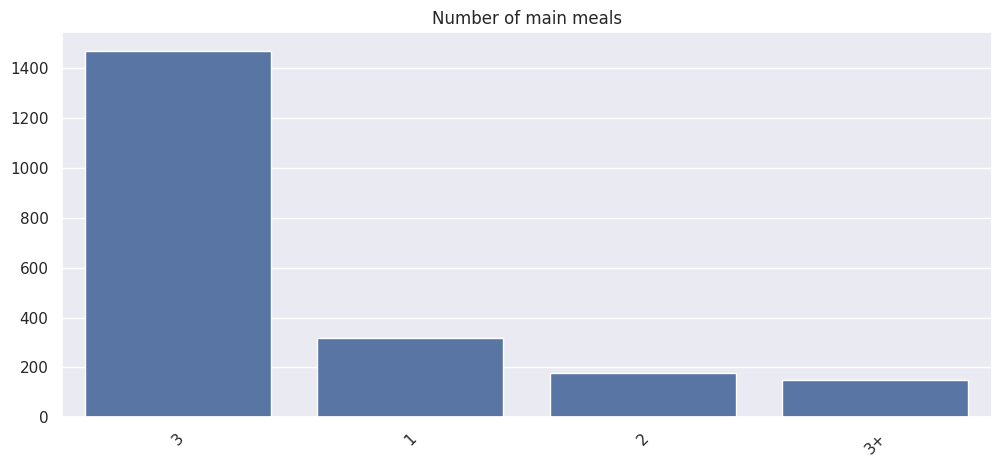

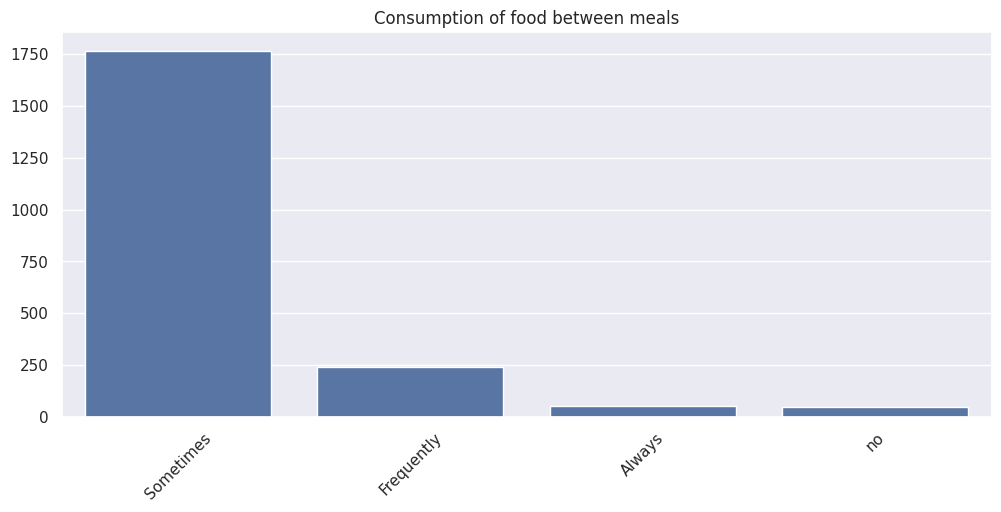

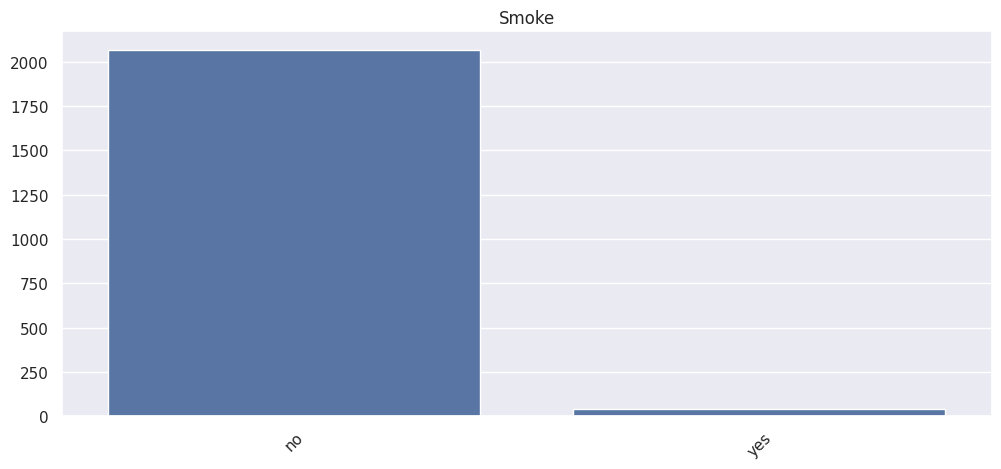

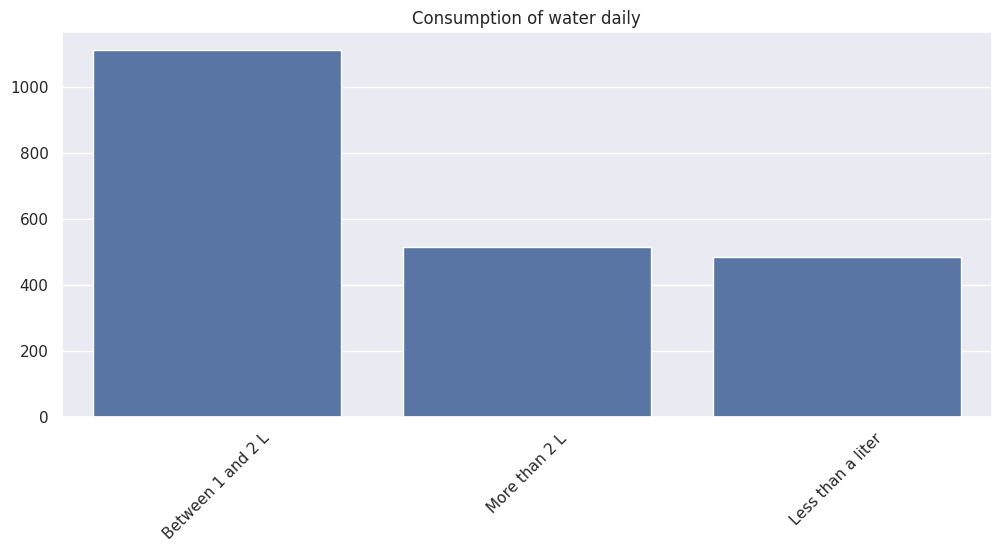

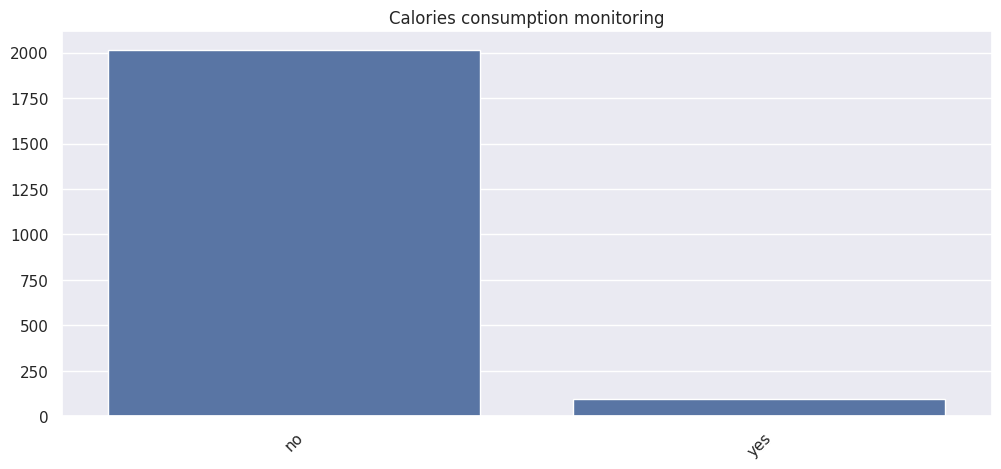

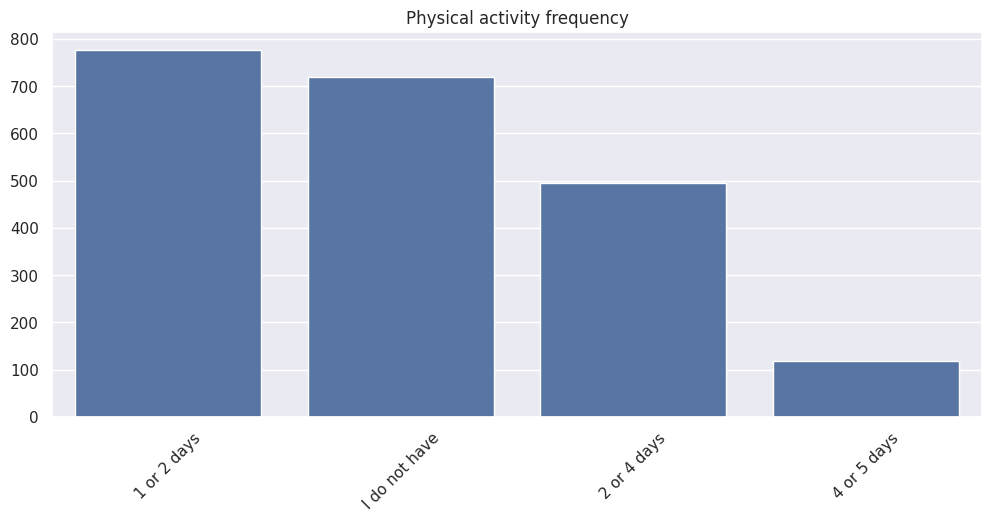

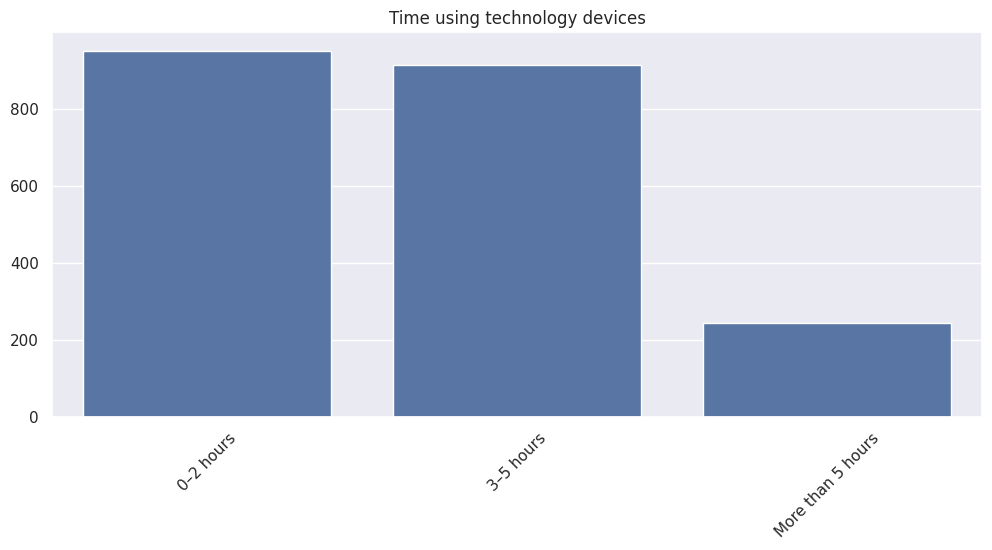

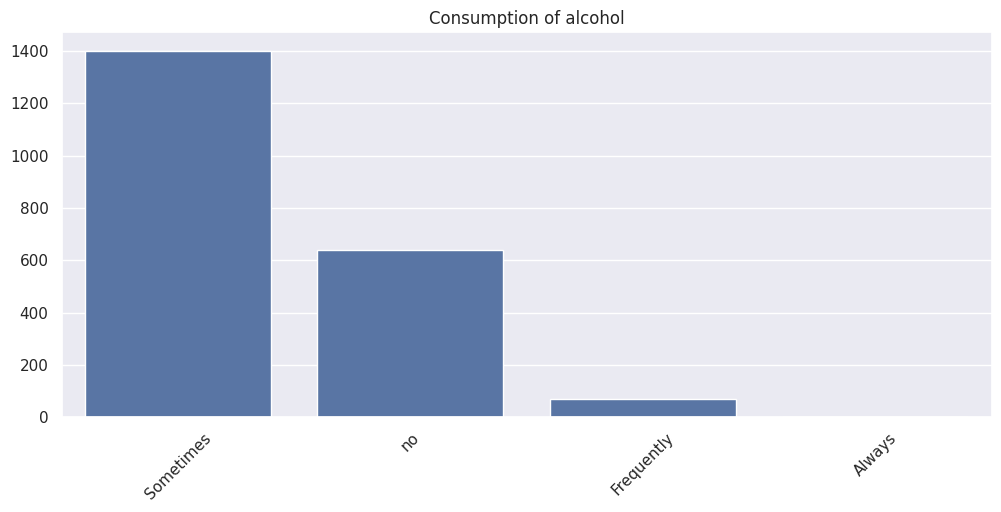

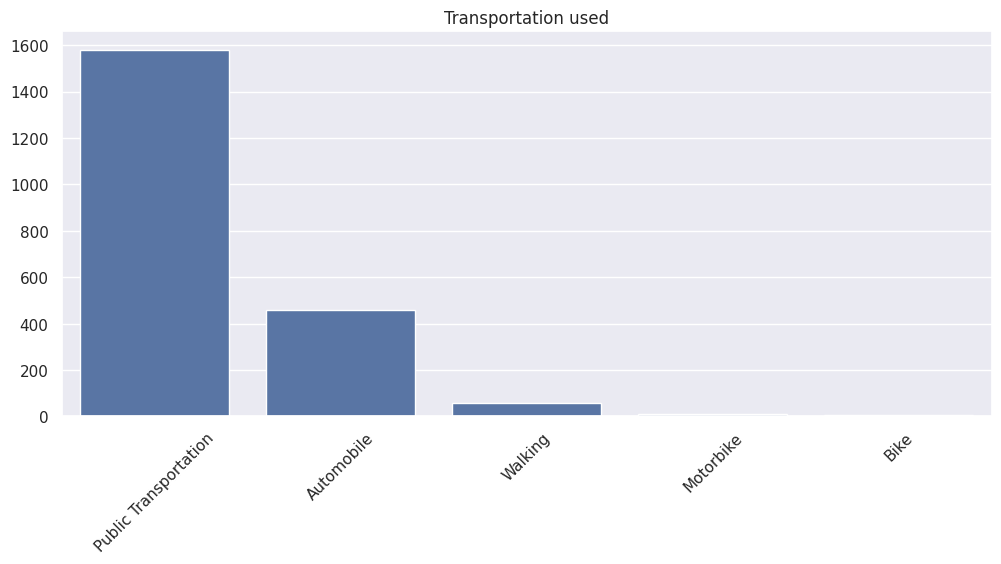

In [ ]:
# Bar Plots for Eating and Exercise Habits
for a in df.columns[4:-1]:
    data = df[a].value_counts()
    values = df[a].value_counts().index.to_list()
    counts = df[a].value_counts().to_list()

    plt.figure(figsize=(12,5))
    ax = sns.barplot(x=values, y=counts)

    plt.title(a)
    plt.xticks(rotation=45)
    plt.show()


## **Class Imbalance**

In [ ]:
# Checking class imbalance for 'Obesity'
obesity_counts = df['Obesity'].value_counts()
print("\nClass Distribution of 'Obesity':\n", obesity_counts)


Class Distribution of 'Obesity':
 Obesity
Obesity Type I         351
Obesity Type III       324
Obesity Type II        297
Overweight Level I     290
Overweight Level II    290
Normal Weight          287
Insufficient Weight    272
Name: count, dtype: int64


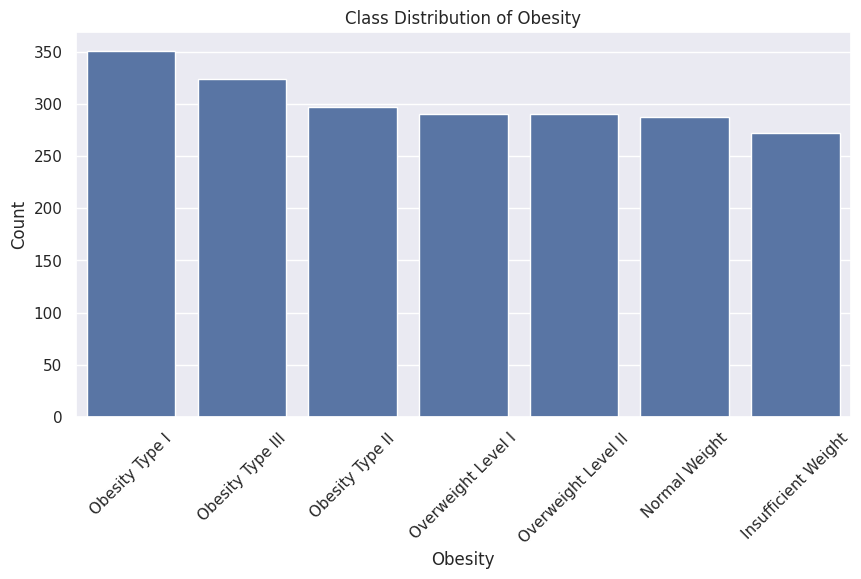

In [ ]:
# Plotting the class distribution for 'Obesity'
plt.figure(figsize=(10,5))
sns.barplot(x=obesity_counts.index, y=obesity_counts.values)
plt.title("Class Distribution of Obesity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# **Data Preprocessing**

In [ ]:
# Create a dictionary to store separate LabelEncoders for each categorical column
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le  # Store the encoder for each categorical column

# Display the transformed DataFrame
print(df.head())

   Gender   Age  Height  Weight  Family History with Overweight  \
0       0  21.0   162.0    64.0                               1   
1       0  21.0   152.0    56.0                               1   
2       1  23.0   180.0    77.0                               1   
3       1  27.0   180.0    87.0                               0   
4       1  22.0   178.0    89.8                               0   

   Frequent consumption of high caloric food  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   Frequency of consumption of vegetables  Number of main meals  \
0                                       2                     2   
1                                       0                     2   
2                                       2                     2   
3                                       

In [ ]:
# Check the data types to identify categorical columns
print(df.dtypes)


Gender                                         int64
Age                                          float64
Height                                       float64
Weight                                       float64
Family History with Overweight                 int64
Frequent consumption of high caloric food      int64
Frequency of consumption of vegetables         int64
Number of main meals                           int64
Consumption of food between meals              int64
Smoke                                          int64
Consumption of water daily                     int64
Calories consumption monitoring                int64
Physical activity frequency                    int64
Time using technology devices                  int64
Consumption of alcohol                         int64
Transportation used                            int64
Obesity                                        int64
dtype: object


# **Model Building**

In [ ]:
# Split the data into features and target variable
X = df.drop('Obesity', axis=1)  # Features
y = df['Obesity']  # Target variable

In [ ]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Model Building Using Random Forest**

In [ ]:
# Build a Random Forest Classifier model with reduced complexity
rf_classifier = RandomForestClassifier(
    n_estimators=50,                # Reduce the number of trees
    max_depth=10,                   # Limit the maximum depth of the trees
    max_features='sqrt',            # Limit the number of features used to split each node
    min_samples_split=4,            # Increase the minimum samples required to split a node
    min_samples_leaf=4,             # Increase the minimum samples required to be at a leaf node
    random_state=42
)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=4,
                       n_estimators=50, random_state=42)

## **Model Building Using Logistic Regression**

In [ ]:
# Logistic Regression Model
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

## **Making Predictions for both the Models**

In [ ]:
# Make predictions on the training and test sets (Random Forest)
y_train_pred_rf = rf_classifier.predict(X_train)
y_test_pred_rf = rf_classifier.predict(X_test)


In [ ]:
# Make predictions on the training and test sets (Logistic Regression)
y_train_pred_lr = lr_classifier.predict(X_train)
y_test_pred_lr = lr_classifier.predict(X_test)


## **Evaluating both the Models**

In [ ]:
# Evaluate Random Forest Model
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
class_report_rf = classification_report(y_test, y_test_pred_rf, target_names=label_encoders['Obesity'].classes_)
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)

In [ ]:
# Evaluate Logistic Regression Model
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
class_report_lr = classification_report(y_test, y_test_pred_lr, target_names=label_encoders['Obesity'].classes_)
conf_matrix_lr = confusion_matrix(y_test, y_test_pred_lr)

## **Checking Training Accuracy of Model Using Random Forest**

In [ ]:
# Print classification report for training set (Random Forest)
print(f"\nRandom Forest Training Accuracy: {train_accuracy_rf*100:.2f}%")
print("\nRandom Forest Classification Report (Training Set):\n", classification_report(y_train, y_train_pred_rf, target_names=label_encoders['Obesity'].classes_))


Random Forest Training Accuracy: 98.05%

Random Forest Classification Report (Training Set):
                      precision    recall  f1-score   support

Insufficient Weight       0.99      0.98      0.99       216
      Normal Weight       0.94      0.96      0.95       225
     Obesity Type I       1.00      0.99      0.99       273
    Obesity Type II       1.00      0.99      0.99       239
   Obesity Type III       1.00      1.00      1.00       261
 Overweight Level I       0.97      0.96      0.96       234
Overweight Level II       0.97      0.97      0.97       240

           accuracy                           0.98      1688
          macro avg       0.98      0.98      0.98      1688
       weighted avg       0.98      0.98      0.98      1688



## **Checking Training Accuracy of Model Using Logistic Regression**

In [ ]:
# Print classification report for training set (Logistic Regression)
print(f"\nLogistic Regression Training Accuracy: {train_accuracy_lr*100:.2f}%")
print("\nLogistic Regression Classification Report (Training Set):\n", classification_report(y_train, y_train_pred_lr, target_names=label_encoders['Obesity'].classes_))



Logistic Regression Training Accuracy: 92.71%

Logistic Regression Classification Report (Training Set):
                      precision    recall  f1-score   support

Insufficient Weight       0.93      0.96      0.95       216
      Normal Weight       0.90      0.86      0.88       225
     Obesity Type I       0.93      0.96      0.94       273
    Obesity Type II       0.99      0.98      0.99       239
   Obesity Type III       1.00      1.00      1.00       261
 Overweight Level I       0.86      0.86      0.86       234
Overweight Level II       0.88      0.86      0.87       240

           accuracy                           0.93      1688
          macro avg       0.93      0.93      0.93      1688
       weighted avg       0.93      0.93      0.93      1688



## **Checking Testing Accuracy of Model Using Random Forest**

In [ ]:
# Print accuracy of model using Random Forest
#print(f"\nRandom Forest Training Accuracy: {train_accuracy_rf*100:.2f}%")
print(f"Random Forest Testing Accuracy: {test_accuracy_rf*100:.2f}%")
print("\nRandom Forest Classification Report:\n", class_report_rf)


Random Forest Testing Accuracy: 92.91%

Random Forest Classification Report:
                      precision    recall  f1-score   support

Insufficient Weight       0.95      0.98      0.96        56
      Normal Weight       0.86      0.79      0.82        62
     Obesity Type I       0.96      0.95      0.95        78
    Obesity Type II       0.97      0.97      0.97        58
   Obesity Type III       1.00      1.00      1.00        63
 Overweight Level I       0.83      0.88      0.85        56
Overweight Level II       0.92      0.94      0.93        50

           accuracy                           0.93       423
          macro avg       0.93      0.93      0.93       423
       weighted avg       0.93      0.93      0.93       423



## **Checking Testing Accuracy of Model Using Logistic Regression**

In [ ]:
# Print accuracy of model using Logistic Regression
#print(f"\nLogistic Regression Training Accuracy: {train_accuracy_lr*100:.2f}%")
print(f"Logistic Regression Testing Accuracy: {test_accuracy_lr*100:.2f}%")
print("\nLogistic Regression Classification Report:\n", class_report_lr)

Logistic Regression Testing Accuracy: 91.96%

Logistic Regression Classification Report:
                      precision    recall  f1-score   support

Insufficient Weight       0.87      0.95      0.91        56
      Normal Weight       0.92      0.76      0.83        62
     Obesity Type I       0.95      0.99      0.97        78
    Obesity Type II       1.00      1.00      1.00        58
   Obesity Type III       1.00      1.00      1.00        63
 Overweight Level I       0.80      0.91      0.85        56
Overweight Level II       0.89      0.80      0.84        50

           accuracy                           0.92       423
          macro avg       0.92      0.91      0.91       423
       weighted avg       0.92      0.92      0.92       423



## **Confusion Matrix for Random Forest**

---



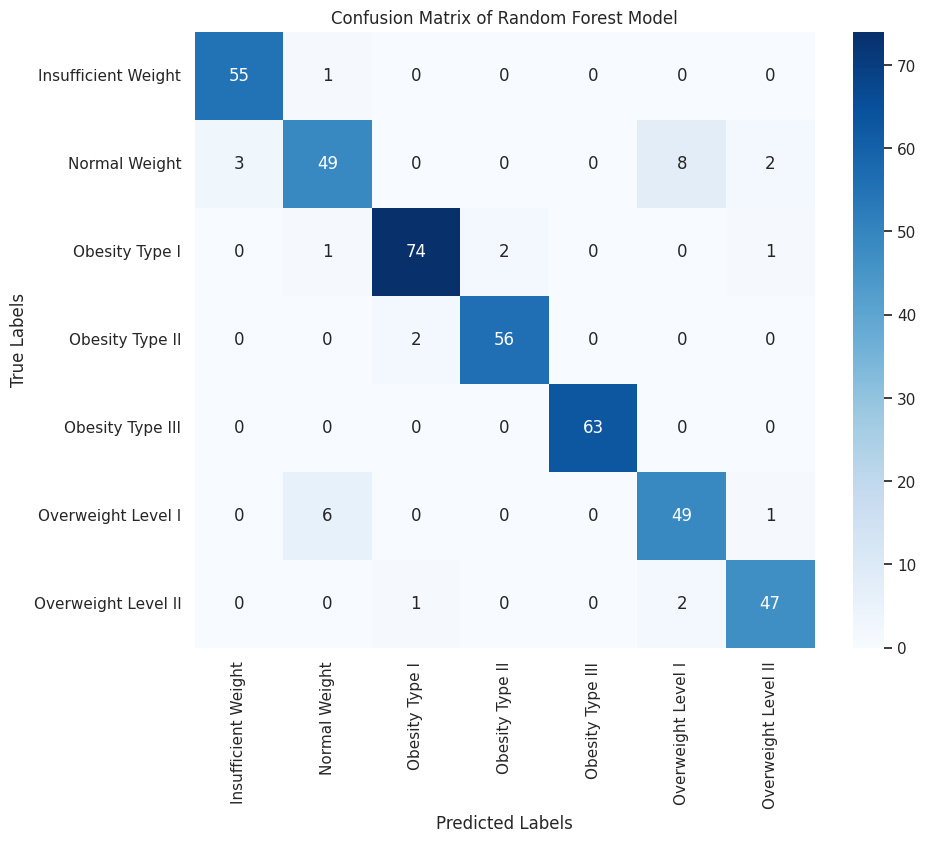

In [ ]:
# Confusion Matrix Heatmap for Random Forest
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Obesity'].classes_, yticklabels=label_encoders['Obesity'].classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Random Forest Model")
plt.show()

## **Confusion Matrix for Logistic Regression**

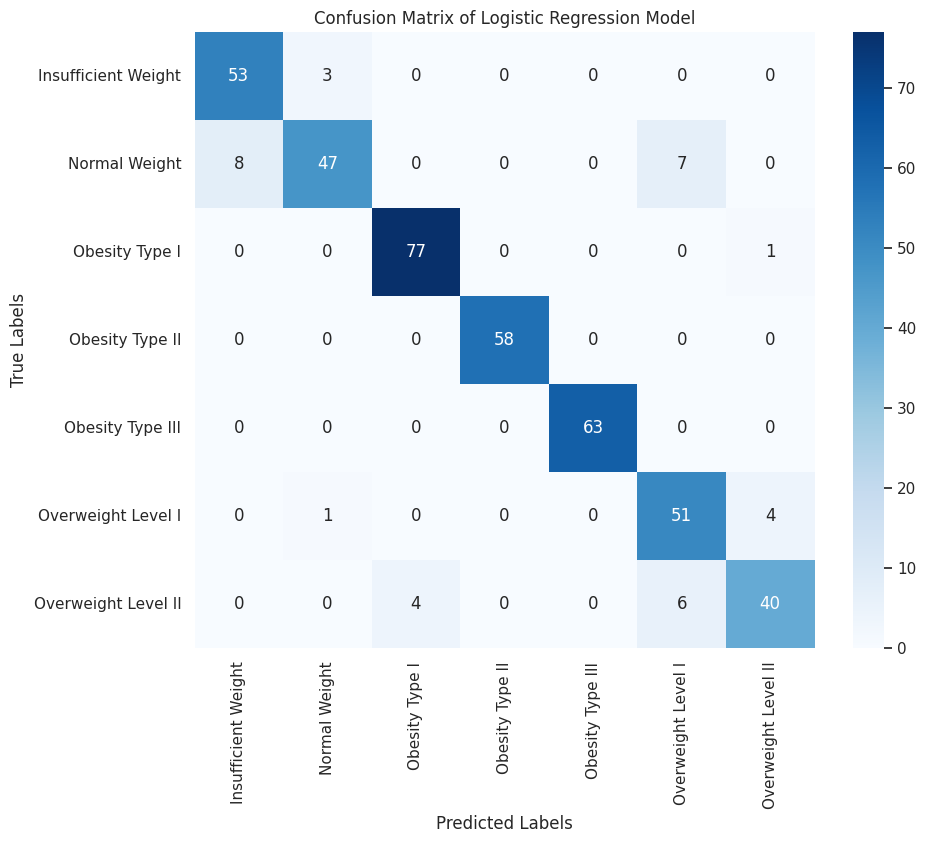

In [ ]:
# Confusion Matrix Heatmap for Logistic Regression
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Obesity'].classes_, yticklabels=label_encoders['Obesity'].classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Logistic Regression Model")
plt.show()


## **Saving Models and Label Encoders**

In [ ]:
# Save the models and label encoders for future use
joblib.dump(rf_classifier, 'random_forest_obesity_model.pkl')  # Save the Random Forest model
joblib.dump(lr_classifier, 'logistic_regression_obesity_model.pkl')  # Save the Logistic Regression model
joblib.dump(label_encoders, 'label_encoders.pkl')  # Save the label encoders

['label_encoders.pkl']

# **Making Predictions**

## **Prediction of a Single Input from the Dataset**

In [ ]:
# Function to make predictions for new input data
def predict_obesity(input_data, model):
    """
    Predicts the Obesity category for the given input data using the specified model.

    Parameters:
    input_data (list): A list of feature values in the same order as the dataset.
    model: Trained model (Random Forest or Logistic Regression).

    Returns:
    str: Predicted Obesity category.
    """
    # Convert the input data into a DataFrame
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Encode categorical variables in the input data using saved encoders
    for column in input_df.columns:
        if column in label_encoders:
            try:
                # Transform the input data using the corresponding label encoder
                input_df[column] = label_encoders[column].transform([input_df[column][0]])
            except ValueError as e:
                print(f"Error: {e}")
                print(f"'{input_df[column][0]}' is not a recognized category for column '{column}'.")

    # Make the prediction
    prediction = model.predict(input_df)

    # Return the decoded prediction
    return label_encoders['Obesity'].inverse_transform(prediction)[0]


In [ ]:
# Example new input for prediction
new_input = ['Female', 21, 162, 64, 'yes', 'no', 'Sometimes', '3', 'Sometimes', 'no', 'Between 1 and 2 L',
             'no', 'I do not have', '3–5 hours', 'no', 'Public Transportation']


In [ ]:
# Make the prediction using Random Forest
predicted_obesity_rf = predict_obesity(new_input, rf_classifier)
print(f"Predicted Obesity Category (Random Forest): {predicted_obesity_rf}")

# Make the prediction using Logistic Regression
predicted_obesity_lr = predict_obesity(new_input, lr_classifier)
print(f"Predicted Obesity Category (Logistic Regression): {predicted_obesity_lr}")

Predicted Obesity Category (Random Forest): Normal Weight
Predicted Obesity Category (Logistic Regression): Normal Weight


## **Prediction of Unseen Data**

In [ ]:
# Load the saved models and label encoders
rf_classifier = joblib.load('random_forest_obesity_model.pkl')
lr_classifier = joblib.load('logistic_regression_obesity_model.pkl')
label_encoders = joblib.load('label_encoders.pkl')

# Load the uploaded dataset
df = pd.read_csv('/content/drive/MyDrive/sy_obesity_dataset.csv')

# Renaming columns for readability
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
              'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables',
              'Number of main meals', 'Consumption of food between meals', 'Smoke',
              'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency',
              'Time using technology devices', 'Consumption of alcohol', 'Transportation used', 'Obesity']

# Encode the features using saved label encoders
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoders[column].transform(df[column])

# Split the data into features and target variable
X = df.drop('Obesity', axis=1)  # Features
y = df['Obesity']  # Target variable

# Decode the actual labels from encoded values using the saved label encoders
actual_obesity = label_encoders['Obesity'].inverse_transform(y)

# Predict using the Random Forest model
predicted_obesity_rf = rf_classifier.predict(X)
predicted_obesity_rf = label_encoders['Obesity'].inverse_transform(predicted_obesity_rf)

# Predict using the Logistic Regression model
predicted_obesity_lr = lr_classifier.predict(X)
predicted_obesity_lr = label_encoders['Obesity'].inverse_transform(predicted_obesity_lr)

# Display the comparison of actual and predicted values
comparison_df = pd.DataFrame({
    'Actual Output': actual_obesity,
    'Predicted RF Output': predicted_obesity_rf,
    'Predicted LR Output': predicted_obesity_lr
})

# Set pandas options to display all rows in the DataFrame
pd.set_option('display.max_rows', None)

# Print the entire comparison DataFrame with all actual and predicted outputs
print(comparison_df)


# Count the correct and incorrect predictions for Random Forest
correct_rf_count = (comparison_df['Actual Output'] == comparison_df['Predicted RF Output']).sum()
incorrect_rf_count = (comparison_df['Actual Output'] != comparison_df['Predicted RF Output']).sum()

# Count the correct and incorrect predictions for Logistic Regression
correct_lr_count = (comparison_df['Actual Output'] == comparison_df['Predicted LR Output']).sum()
incorrect_lr_count = (comparison_df['Actual Output'] != comparison_df['Predicted LR Output']).sum()

# Print the counts
print("\nCounts of Predictions:")
print(f"Random Forest - Correct: {correct_rf_count}, Incorrect: {incorrect_rf_count}")
print(f"Logistic Regression - Correct: {correct_lr_count}, Incorrect: {incorrect_lr_count}")


           Actual Output  Predicted RF Output  Predicted LR Output
0     Overweight Level I   Overweight Level I   Overweight Level I
1        Obesity Type II      Obesity Type II      Obesity Type II
2          Normal Weight        Normal Weight        Normal Weight
3     Overweight Level I   Overweight Level I   Overweight Level I
4         Obesity Type I       Obesity Type I       Obesity Type I
5    Insufficient Weight  Insufficient Weight  Insufficient Weight
6       Obesity Type III     Obesity Type III     Obesity Type III
7        Obesity Type II      Obesity Type II      Obesity Type II
8     Overweight Level I   Overweight Level I   Overweight Level I
9     Overweight Level I   Overweight Level I   Overweight Level I
10    Overweight Level I   Overweight Level I   Overweight Level I
11        Obesity Type I       Obesity Type I       Obesity Type I
12       Obesity Type II      Obesity Type II      Obesity Type II
13   Insufficient Weight  Insufficient Weight  Insufficient We

## **Confusion Matrix for Unseen Dataset using Random Forest**

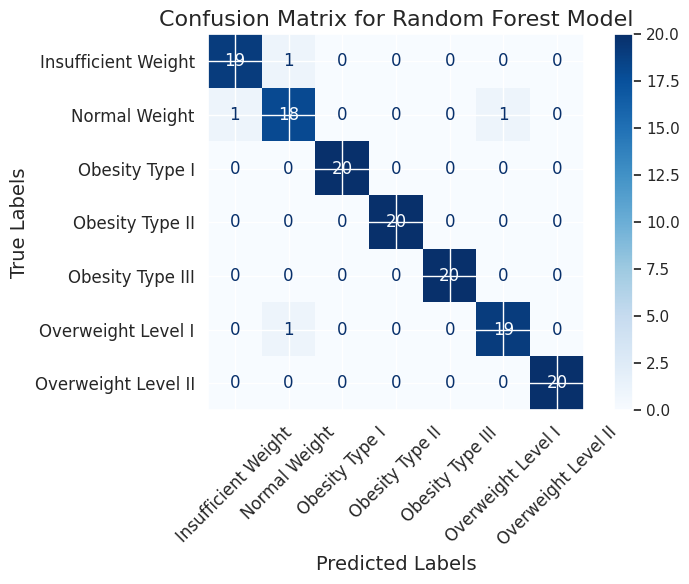

In [ ]:

# Assuming you have the actual labels and predictions for Random Forest
# actual_obesity, predicted_obesity_rf

# Calculate confusion matrix for Random Forest
cm_rf = confusion_matrix(actual_obesity, predicted_obesity_rf, labels=label_encoders['Obesity'].classes_)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))  # Set the figure size
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=label_encoders['Obesity'].classes_)
disp_rf.plot(cmap=plt.cm.Blues, ax=plt.gca())  # Plot on current axis

# Set titles and labels
plt.title('Confusion Matrix for Random Forest Model', fontsize=16)  # Title
plt.xticks(rotation=45, fontsize=12)  # Rotate x-tick labels
plt.yticks(fontsize=12)  # Y-tick labels
plt.xlabel('Predicted Labels', fontsize=14)  # X-axis label
plt.ylabel('True Labels', fontsize=14)  # Y-axis label
plt.tight_layout()  # Adjust layout
plt.show()


### **Confusion Matrix for Unseen Dataset using Logistic Regression**

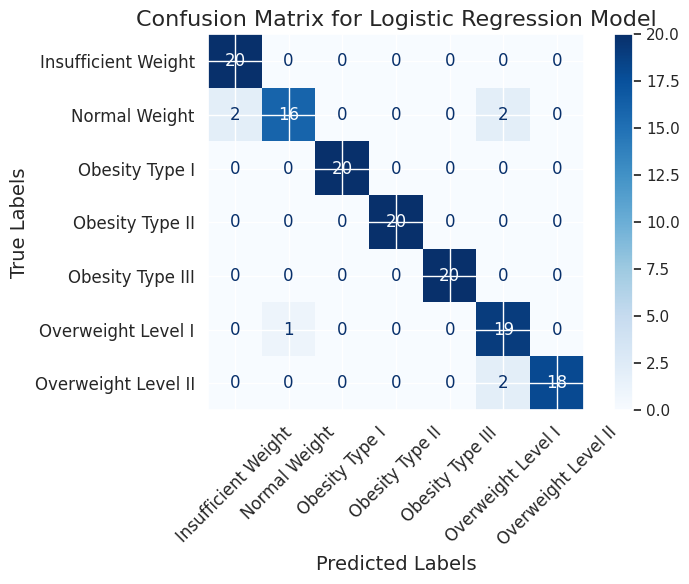

In [ ]:
# Assuming you have the actual labels and predictions for Logistic Regression
# actual_obesity, predicted_obesity_lr

# Calculate confusion matrix for Logistic Regression
cm_lr = confusion_matrix(actual_obesity, predicted_obesity_lr, labels=label_encoders['Obesity'].classes_)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8,6))  # Set the figure size
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=label_encoders['Obesity'].classes_)
disp_lr.plot(cmap=plt.cm.Blues, ax=plt.gca())  # Plot on current axis

# Set titles and labels
plt.title('Confusion Matrix for Logistic Regression Model', fontsize=16)  # Title
plt.xticks(rotation=45, fontsize=12)  # Rotate x-tick labels
plt.yticks(fontsize=12)  # Y-tick labels
plt.xlabel('Predicted Labels', fontsize=14)  # X-axis label
plt.ylabel('True Labels', fontsize=14)  # Y-axis label
plt.tight_layout()  # Adjust layout
plt.show()
